In [1]:
from classAnalysis import Analysis
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
teste = Analysis(3375, 50.0, 140, 1, '/home/alebaal/Documents/thermoCapillaryWavesPosGz/*00000.pos.gz')

In [3]:
teste.loop()

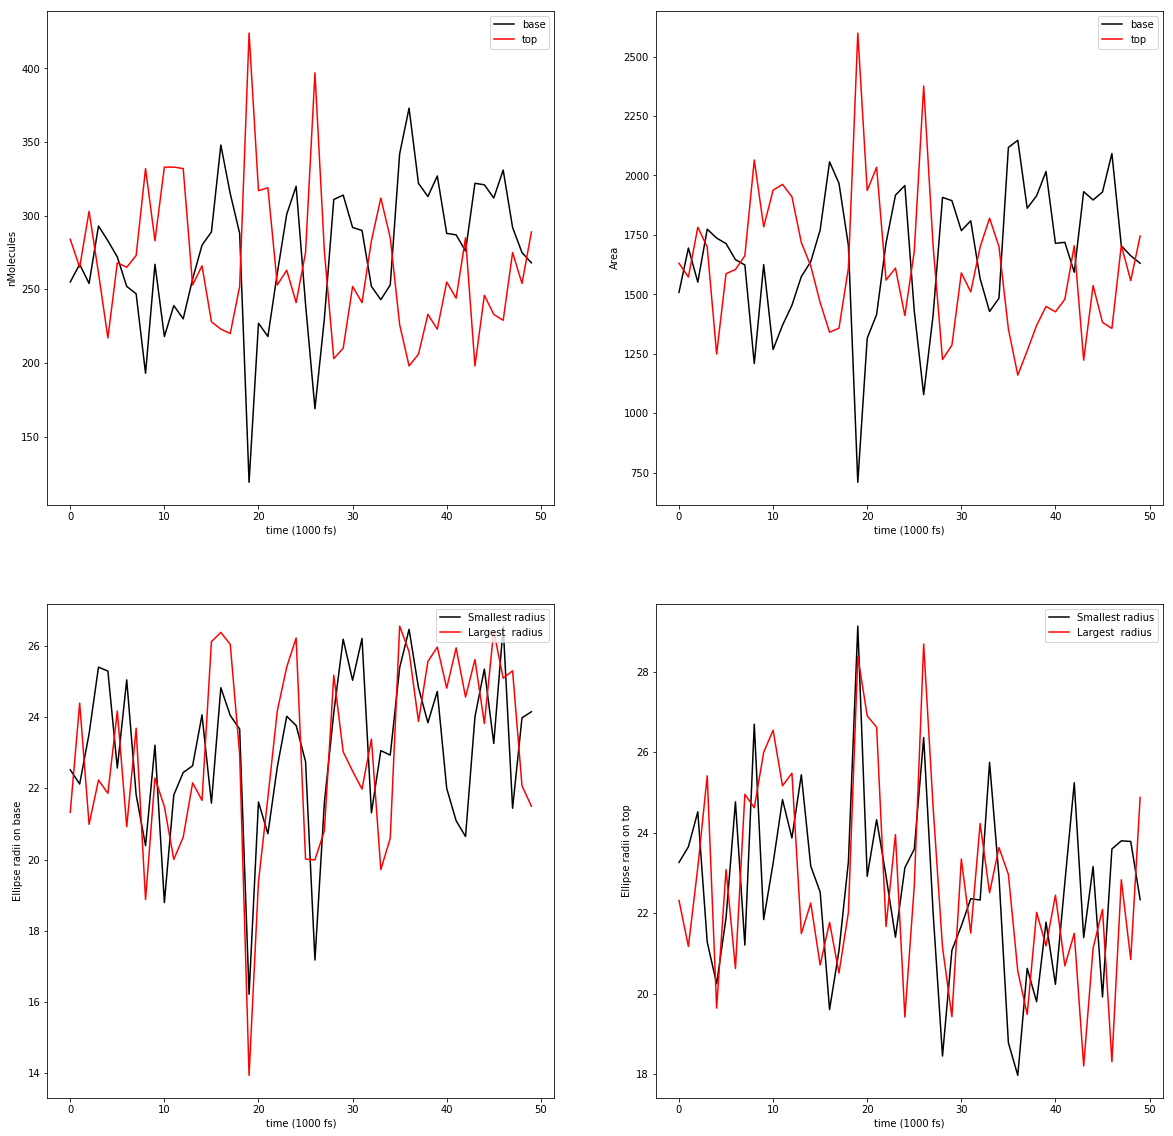

In [4]:
teste.plotPar()

In [5]:
slab = 10
pos = len(teste.filesPos)
for i in range(slab):
    for j in range(pos):
        teste.plotSlab(i,j, path = '/home/alebaal/Documents/resultsThermoCapWaves/')


In [7]:
len(teste.listProfiles)

420

In [4]:
teste2 = Analysis(3375, 50.0, 140, 1, '/home/alebaal/Documents/thermoCapillaryWavesPosGz/42555000.pos.gz')

In [5]:
teste2.loop()

In [9]:
teste2.plotSlab(0,0)

In [2]:
    def addProfile(self, path):
        self.getOxygenPos(path) 
        self.correctBoardEffect()
        self.removeOutMolecules()
        self.listProfiles.append(self.findProfile()) 
         


    def getsCM(X):
        '''
        Calculates the Center of Mass
        '''
        return np.sum(X, axis=0)/3375

    def correctBoardEffect(self):
        '''
        Fix the boarder problem and calculate the CM
        '''
        CM = self.getsCM()
        OatomsFix = self.Oatoms
        OatomsFix[:,1:] -= CM[1:]

        Oatoms_out_index  = np.where(abs(OatomsFix[:,1]) > self.L/2)
        Oatoms_out_index2 = np.where(OatomsFix[Oatoms_out_index] > 0)
        OatomsFix[Oatoms_out_index2] -= self.L 
        Oatoms_out_index3 = np.where(OatomsFix[Oatoms_out_index] < 0)
        OatomsFix[Oatoms_out_index3] += self.L 

        Oatoms_out_index  = np.where(abs(OatomsFix[:,2]) > self.L/2)
        Oatoms_out_index2 = np.where(OatomsFix[Oatoms_out_index] > 0)
        OatomsFix[Oatoms_out_index2] -= self.L 
        Oatoms_out_index3 = np.where(OatomsFix[Oatoms_out_index] < 0)
        OatomsFix[Oatoms_out_index3] += self.L 

        OatomsFix[:,1:] += CM[1:]

    #    CM = self.getsCM() #Check this line. Maybe it is before Oatoms
        self.Oatoms = OatomsFix

In [3]:
rawData = np.genfromtxt('/home/alebaal/Documents/thermoCapillaryWavesPosGz/42555000.pos.gz',dtype="float",skip_header=9)
Oatoms = rawData[np.where(rawData[:,1]==2)][:,2:] 

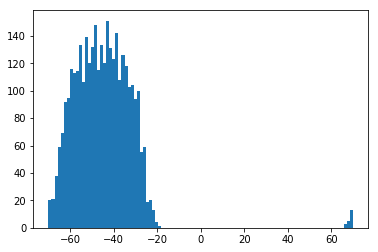

In [4]:
plt.hist(Oatoms[:,1],bins=100);

In [5]:
CM = getsCM(Oatoms)


In [6]:
CM

array([  2.78698613, -45.08285247,  -0.92573064])

In [7]:
OatomsFix = Oatoms
OatomsFix[:,1:] -= CM[1:]
OatomsFix[0]

array([7.97984   , 0.96825247, 0.02518364])

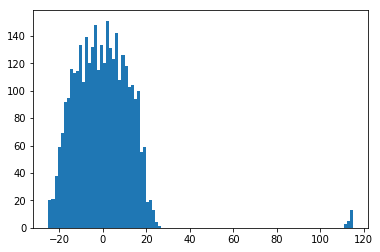

In [8]:
plt.hist(OatomsFix[:,1],bins=100);

In [9]:
Oatoms_out_index  = np.where(abs(OatomsFix[:,1]) > 140/2)
Oatoms_out_index2 = np.where(OatomsFix[Oatoms_out_index][:,1] > 0)
OatomsFix[Oatoms_out_index[0][Oatoms_out_index2],1] -= 140 

Oatoms_out_index  = np.where(abs(OatomsFix[:,1]) > 140/2)
Oatoms_out_index3 = np.where(OatomsFix[Oatoms_out_index][:,1] < 0)
OatomsFix[Oatoms_out_index[0][Oatoms_out_index3],1] += 140 

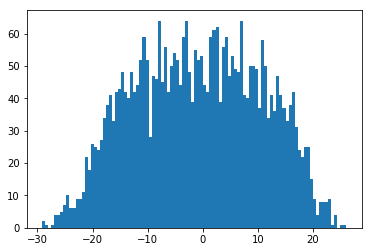

In [10]:
plt.hist(OatomsFix[:,1],bins=100);

In [11]:
Oatoms_out_index  = np.where(abs(OatomsFix[:,2]) > 140/2)
Oatoms_out_index2 = np.where(OatomsFix[Oatoms_out_index][:,2] > 0)
OatomsFix[Oatoms_out_index[0][Oatoms_out_index2],2] -= 140 

Oatoms_out_index  = np.where(abs(OatomsFix[:,2]) > 140/2)
Oatoms_out_index3 = np.where(OatomsFix[Oatoms_out_index][:,2] < 0)
OatomsFix[Oatoms_out_index[0][Oatoms_out_index3],2] += 140 

In [12]:
OatomsFix[:,1:] += CM[1:]
CM = getsCM(OatomsFix)
OatomsFix[:,1:] -= CM[1:]


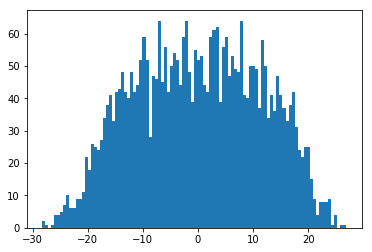

In [14]:
plt.hist(OatomsFix[:,1],bins=100);

In [13]:
CM

array([  2.78698613, -45.08285247,  -0.92573064])